Daniela Quijano
Machine Learning
Spring 2022

The purpose of this notebook is to create and implement at least four different cross-validation methods. 

Then pick two cross-validation methods to compare the performance of SVM, Decision tree, AdaBoost, and Random Forest model on the breast cancer data.

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import tree
from sklearn.tree import plot_tree




In [3]:
#Import data
data= pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/wdbc.data')
#Trim data to only contain features a through j listed above 

data=data.iloc[:,0:12]
data.columns = ['ID', 'Diagnosis', 'Radius','Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave Points', 'Symmetry', 'Fractal Dimension']
data

,ID,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave Points,Symmetry,Fractal Dimension
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [4]:
#Train Test Split Data
X = data.drop('Diagnosis',axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


## Comparing Support Vector Machine, Rnadom Forest, Decision Tree, and AdaBoost Classifiers with no hyperparameter Tuning

In [44]:
#"Decision_Tree", "Random_Forest"
models_list = ["SVM","Decision_Tree","Random_Forest","AdaBoost"]

In [45]:
#DecisionTreeClassifier(max_depth=5),RandomForestClassifier()
models_call = [SVC(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier()]

In [46]:
#Iterate through model names and model calls in order to get the accuracy scores for each model 
accuracy_scores = []
for model_name, model in zip(models_list, models_call):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy_scores.append(score)

In [47]:
accuracy_scores

[0.6140350877192983,
 0.9298245614035088,
 0.9473684210526315,
 0.9473684210526315]

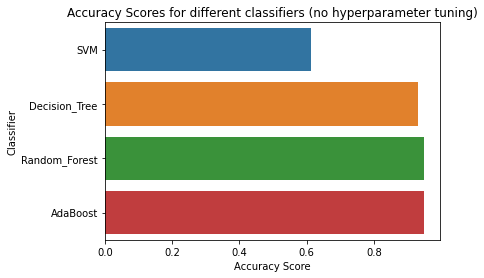

In [51]:
scores_df = pd.DataFrame()
scores_df['name'] = models_list
scores_df['score'] = accuracy_scores
scores_df = scores_df.rename(columns={"name":"Classifier"})
scores_df = scores_df.rename(columns={"score":"Accuracy Score (No Tuning)"})
scores_barplot = sns.barplot(y="Classifier", x="Accuracy Score (No Tuning)", data=scores_df).set(xlabel="Accuracy Score", ylabel = "Classifier",title='Accuracy Scores for different classifiers (no hyperparameter tuning)')


## Tuning Hyperparameters for each model

In [17]:
#Make empty list to add the scores of the models after grid search for best hyperparameters
tuned_scores=[]

### Tuning Hyperparameters for Support Vector Machines Classifier

In [12]:
#According to documentation, 'Proper choice of C and gamma is critical to the SVM’s performance'
#Tuning for C and gamma

parameter_tuning_svm={'C': [ 0.1,1], 'gamma': [1,0.1,0.01]}

In [13]:
svm = SVC()
grid_SVM=GridSearchCV(svm,
                     param_grid=parameter_tuning_svm
                    )
grid_SVM.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01]})

In [14]:
grid_SVM.best_params_

{'C': 0.1, 'gamma': 1}

In [18]:
tuned_scores.append(grid_SVM.best_score_)

### Tuning Hyperparameters for Decision Tree Classifier

In [9]:
#Set ranges for hyperparameters
parameter_tuning_dt={
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,6)
}

In [10]:
dec_tree=DecisionTreeClassifier()
grid_DT=GridSearchCV(dec_tree,
                     param_grid=parameter_tuning_dt
                    )
grid_DT.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6)})

In [11]:
grid_DT.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [20]:
tuned_scores.append(grid_DT.best_score_)

### Tuning Hyperparameters for Random Forest Classifier

In [24]:
#Set ranges for hyperparameters 
parameter_tuning_rf={
    'criterion':['gini', 'entropy'],
    'max_depth':range(1,6),
    'n_estimators': np.arange(10,180,10)
}

In [25]:
#Train model with grid search parameters
rf = RandomForestClassifier()
grid_RF=GridSearchCV(rf,
                     param_grid=parameter_tuning_rf
                    )
grid_RF.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170])})

In [26]:
grid_RF.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 70}

In [27]:
tuned_scores.append(grid_RF.best_score_)

### Tuning Hyperparameters for AdaBoost Classifier

In [33]:
#Default estimator is decision tree classifier.
#Changing values for n_estimators and learning rate since there is a tradeoff between the two
parameter_tuning_Ada={
    'n_estimators': np.arange(20,80,10),
    'learning_rate':np.arange(0.1,2.1,0.2),
}

In [34]:
Ada=AdaBoostClassifier()
grid_Ada=GridSearchCV(Ada,
                     param_grid=parameter_tuning_Ada
                    )
grid_Ada.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'n_estimators': array([20, 30, 40, 50, 60, 70])})

In [32]:
#Get best estimator parameters
grid_Ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 50}

In [35]:
#Add the best score to list to summarize performance later
tuned_scores.append(grid_Ada.best_score_)

### Summary of performance of tuned models

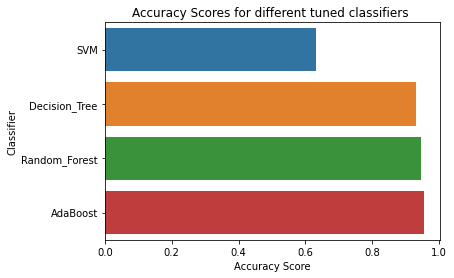

In [55]:
scores_tuned_df = pd.DataFrame()
scores_tuned_df['name'] = models_list
scores_tuned_df['score'] = tuned_scores
scores_tuned_df = scores_tuned_df.rename(columns={"name":"Classifier"})
scores_tuned_df = scores_tuned_df.rename(columns={"score":"Accuracy Score (Hyperparameter Tuning)"})
scores_barplot = sns.barplot(y="Classifier", x="Accuracy Score (Hyperparameter Tuning)", data=scores_tuned_df).set(xlabel="Accuracy Score", ylabel = "Classifier",title='Accuracy Scores for different tuned classifiers ')


In [58]:
#Comparison of classifier performance with and without hyperparameter tuning
scores_df['Accuracy Score (Hyperparameter Tuning)']=tuned_scores
scores_df

,Classifier,Accuracy Score (No Tuning),Accuracy Score (Hyperparameter Tuning)
0,SVM,0.614035,0.632161
1,Decision_Tree,0.929825,0.931648
2,Random_Forest,0.947368,0.944908
3,AdaBoost,0.947368,0.953773


## Cross Validation

Here I will report the cross validation score with different methods of cross validation for each of the models. Note: The default number of splits is 10.

In [113]:
#The lists below will be used to store average cross validation scores for each classifier and will beused to build a report
#k-fold cross validation empty list
kfold=[]
#Shuffle split cross validation empty list
shuffle=[]
#Stratified shuffle split validation empty list
strat_shuffle=[]

## Cross Validation for Suport Vector Machines Classifier

In [ ]:
#Tuned Model
SVM_tuned =SVC(C=0.1, gamma=1)

In [121]:
#K-fold cross validation
#Shuffle parameter set to true to False,to not shuffle data before it is split into batches

cv_kfold = KFold( shuffle=False)
scores_kfold_svm=cross_val_score(SVM_tuned, X, y, cv=cv_kfold)
kfold.append(scores_kfold_svm.mean())
scores_kfold_svm.mean()

0.6289706567303214

In [123]:
#Shuffle Split cross validation
cv_shuffle = ShuffleSplit( test_size=0.3, random_state=0)
scores_shuffle_svm=cross_val_score(SVM_tuned, X, y, cv=cv_shuffle)
shuffle.append(scores_shuffle_svm.mean())
scores_shuffle_svm.mean()

0.6426900584795321

In [124]:
#Stratified  shuffle split
cv_strat_shuffle = StratifiedShuffleSplit(test_size=0.3)
scores_strat_shuffle_svm=cross_val_score(SVM_tuned, X, y, cv=cv_strat_shuffle)
strat_shuffle.append(scores_strat_shuffle_svm.mean())
scores_strat_shuffle_svm.mean()

0.6257309941520468

## Cross Validation for Decision Tree Classifier

In [75]:
#Tuned Model
dec_tree_tuned=DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)

In [125]:
#K-fold cross validation
scores_kfold_dt=cross_val_score(dec_tree_tuned, X, y, cv=cv_kfold)
kfold.append(scores_kfold_dt.mean())
scores_kfold_dt.mean()

0.9138643067846608

In [126]:
#Shuffle Split cross validation
scores_shuffle_dt=cross_val_score(dec_tree_tuned, X, y, cv=cv_shuffle)
shuffle.append(scores_shuffle_dt.mean())
scores_shuffle_dt.mean()

0.9257309941520466

In [127]:
#Stratified  shuffle split
scores_strat_shuffle_dt=cross_val_score(dec_tree_tuned, X, y, cv=cv_strat_shuffle)
strat_shuffle.append(scores_strat_shuffle_dt.mean())
scores_strat_shuffle_dt.mean()

0.932748538011696

## Cross Validation for Random Forest Classifier

In [78]:
#Tuned Model
rf_tuned = RandomForestClassifier(criterion= 'entropy', max_depth= 5, n_estimators=70)

In [128]:
#K-fold cross validation
scores_kfold_rf=cross_val_score(rf_tuned, X, y, cv=cv_kfold)
kfold.append(scores_kfold_rf.mean())
scores_kfold_rf.mean()

0.936655798789008

In [129]:
#Shuffle Split cross validation
scores_shuffle_rf=cross_val_score(rf_tuned, X, y, cv=cv_shuffle)
shuffle.append(scores_shuffle_rf.mean())
scores_shuffle_rf.mean()

0.9421052631578949

In [130]:
#Stratified  shuffle split
scores_strat_shuffle_rf=cross_val_score(rf_tuned, X, y, cv=cv_strat_shuffle)
strat_shuffle.append(scores_strat_shuffle_rf.mean())
scores_strat_shuffle_rf.mean()

0.9467836257309943

## Cross Validation for Adaboost Classifier

In [82]:
#Tuned Model
Ada_tuned=AdaBoostClassifier(learning_rate=0.5, n_estimators= 50)

In [131]:
#K-fold cross validation
scores_kfold_Ada=cross_val_score(Ada_tuned, X, y, cv=cv_kfold)
kfold.append(scores_kfold_Ada.mean())
scores_kfold_Ada.mean()

0.9489675516224189

In [132]:
#Shuffle Split Cross Validation
scores_shuffle_Ada=cross_val_score(Ada_tuned, X, y, cv=cv_shuffle)
shuffle.append(scores_shuffle_Ada.mean())
scores_shuffle_Ada.mean()

0.9479532163742691

In [133]:
#Stratified  shuffle split
scores_strat_shuffle_Ada=cross_val_score(Ada_tuned, X, y, cv=cv_strat_shuffle)
strat_shuffle.append(scores_strat_shuffle_Ada.mean())
scores_strat_shuffle_Ada.mean()

0.9450292397660819

### Summarizing cross validation results


In [156]:
#Making a dataframe that contains the average values for cross validations scores with different cross validation metrics

results=pd.DataFrame()
results['Models'] = models_list
results['Mean score K-Fold'] = kfold
results['Mean score Shuffle Split']=shuffle
results['Mean score Stratified Shuffle Split']=strat_shuffle
results

,Models,Mean score K-Fold,Mean score Shuffle Split,Mean score Stratified Shuffle Split
0,SVM,0.628971,0.642690,0.625731
1,Decision_Tree,0.913864,0.925731,0.932749
2,Random_Forest,0.936656,0.942105,0.946784
3,AdaBoost,0.948968,0.947953,0.945029


In [157]:
#Changing format to long to be able to make a grouped bar plot to summarize results
results_melt = pd.melt(results, id_vars=["Models"], value_vars=["Mean score K-Fold", "Mean score Shuffle Split","Mean score Stratified Shuffle Split"])

In [158]:
results_melt

,Models,variable,value
0,SVM,Mean score K-Fold,0.628971
1,Decision_Tree,Mean score K-Fold,0.913864
2,Random_Forest,Mean score K-Fold,0.936656
3,AdaBoost,Mean score K-Fold,0.948968
4,SVM,Mean score Shuffle Split,0.642690
5,Decision_Tree,Mean score Shuffle Split,0.925731
6,Random_Forest,Mean score Shuffle Split,0.942105
7,AdaBoost,Mean score Shuffle Split,0.947953
8,SVM,Mean score Stratified Shuffle Split,0.625731
9,Decision_Tree,Mean score Stratified Shuffle Split,0.932749


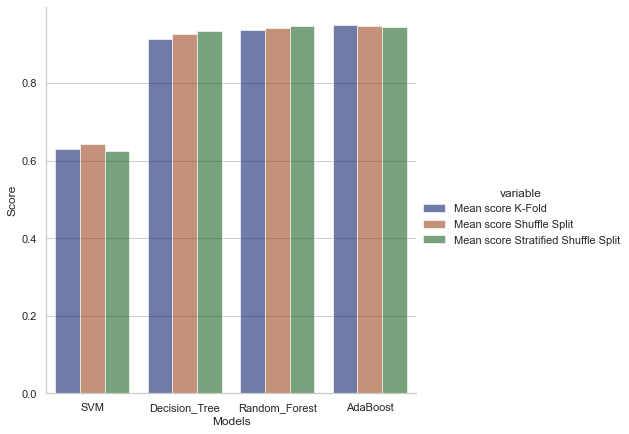

In [173]:
sns.set_theme(style="whitegrid", palette="pastel")
bar_graph = sns.catplot(
    data=results_melt, kind="bar",
    x="Models", y="value", hue="variable",
    ci="sd", palette="dark", alpha=.6, height=6
).set(xlabel="Models", ylabel = "Score")

## Implementing Cross Validation Methods

### Methods for implementing cross validation:
- cross_validate: returns a dict containing fit-times, score-times (and optionally training scores as well as fitted estimators) in addition to the test score
- cross_val_score
- cross_val_predict: returns, for each element in the input, the prediction that was obtained for that element when it was in the test set 
- KFold divides all the samples in  groups of samples, called folds
- RepeatedKFold: repeats K-Fold n times
- LeaveOneOut (or LOO): is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out 
- LeavePOut: similar to LeaveOneOut as it creates all the possible training/test sets by removing  samples from the complete set
- ShuffleSplit: iterator, will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.
- StratifiedKFold: variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.
- StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits
- GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing and training sets. 
- StratifiedGroupKFold: cross-validation scheme that combines both StratifiedKFold and GroupKFold. The idea is to try to preserve the distribution of classes in each split while keeping each group within a single split.
- LeaveOneGroupOut: cross-validation scheme which holds out the samples according to a third-party provided array of integer groups.
- LeavePGroupsOut: is similar as LeaveOneGroupOut, but removes samples related to  groups for each training/test set.
- GroupShuffleSplit
- TimeSeriesSplit: is a variation of k-fold which returns first  folds as train set and the  th fold as test set. 